# [범주형 데이터 이진분류](https://www.kaggle.com/c/cat-in-the-dat)

## 탐색적 데이터 분석

### 데이터 둘러보기

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/train.csv', index_col='id')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/test.csv', index_col='id')
submission = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/sample_submission.csv', index_col='id')

In [ ]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [ ]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [ ]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [ ]:
train.shape, test.shape

((300000, 24), (200000, 23))

#### 피처 요약본 만들기

피처별 데이터 타입, 결측값 개수, 교윳값 개수, 실제 입력값 등을 정리한 표

1. 피처별 데이터 타입 DataFrame 생성
2. 인덱스 재설정 후 열 이름 변경
3. 결측값 개수, 고윳값 개수, 1 ~ 3행 입력값 추가

##### 피처별 데이터 타입 DataFrame 생성
- DataFrame 객체에서 dtypes를 호출하면 피처별 데이터 타입을 반환해준다.

In [ ]:
train.dtypes[:5]

bin_0     int64
bin_1     int64
bin_2     int64
bin_3    object
bin_4    object
dtype: object

In [ ]:
summary = pd.DataFrame(train.dtypes, columns=['데이터 타입'])
summary.head()

,데이터 타입
bin_0,int64
bin_1,int64
bin_2,int64
bin_3,object
bin_4,object


##### 인덱스 재설정 후 열 이름 변경
- reset_index()로 인덱스를 재설정한다.
- rename() 함수를 활용해 열 이름을 '피처'로 변경한다.

In [ ]:
summary = summary.reset_index()
summary.head()

,index,데이터 타입
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object


In [ ]:
summary = summary.rename(columns={'index': '피처'})
summary.head()

,피처,데이터 타입
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object


##### 결측값 개수, 교윳값 개수, 1 ~ 3행 입력값 추가

- isnull(): 결측값의 포함여부를 True, False로 반환하는 함수
- nunique(): 피처별 고윳값 개수를 구하는 함수
- values: Series 객체에서 값만 추출하기 위해 사용

In [ ]:
# 피처별 결측값 개수
summary['결측값 개수'] = train.isnull().sum().values

# 피처별 교윳값 개수
summary['고윳값 개수'] = train.nunique().values

# 1 ~ 3행에 입력되어 있는 값
# 각 피처에 실제 어떤 값이 들어가있는지 확인하기 위함
summary['첫 번째 값'] = train.loc[0].values
summary['두 번째 값'] = train.loc[1].values
summary['세 번째 값'] = train.loc[2].values

summary.head()

,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y


##### 피처 요약표 생성 함수

In [ ]:
import pandas as pd

def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

In [ ]:
resumetable(train)

데이터셋 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


##### 피처 확인

In [ ]:
# 순서형 피처의 순서를 파악하기 위해 순서형 피처의 고윳값을 출력해본다.
# 고윳값 개수가 적은 0 ~ 2 피처를 확인한다.

for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}') # 주의: unique() 함수는 고윳값이 등장한 순으로 출력한다.

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [ ]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}') # 주의: unique() 함수는 고윳값이 등장한 순으로 출력한다.

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [ ]:
# 일, 월, 타깃값
print('day 고윳값: ', train['day'].unique())
print('month 고윳값: ', train['month'].unique())
print('target 고윳값: ', train['target'].unique())

day 고윳값:  [2 7 5 4 3 1 6]
month 고윳값:  [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값:  [0 1]


#### 피처 요약표 해석하기

- bin_0 ~ 4 : 이진 피처
    - 교윳값 2개
        - 0 ~ 2: int64(0 or 1)
        - 3 ~ 4: object(T or F, Y or N)
    - 머신러닝 모델은 숫자만 인식하기 때문에, 모델링할 때 T, Y는 1로, F, N은 0으로 인코딩하자.

- nom_0 ~ 9 : 명목형 피처
    - 0 ~ 4까지는 고윳값 6개 이하
    - 5 ~ 9까지는 많은 고윳값
        - 의미를 알 수 없는 값들이 입력되어 있다.

- ord_0 ~ 5 : 순서형 피처
    - 0: 고윳값이 모두 숫자
    - 1: 캐글 등급
    - 2: 춥고 더운 정도
    - ord_3, ord_4, ord_5 : 알파벳순으로 고윳값 순서를 매김

- day, month : 날짜 피처
    - day: 7개의 숫자로 구성되어 있으며, 요일을 나타낸다고 짐작할 수 있다.
    
- target : 0, 1의 범주형 데이터

### 데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 타깃값 분포

**To-do**
- 타깃값 분포를 통해 데이터가 얼마나 불균형한지 파악한다. 이를 통해, 부족한 타깃값에 더 집중해 모델링이 이루어질 수 있도록 한다.
- countplot()은 범주형 데이터의 개수를 확인할 때 주로 사용하므로, 이를 통해 타깃값 0과 1의 개수를 파악한다.
- 타깃값 비율을 표시한다.

**ax.patches**
- 'ax축을 구성하는 그래프 도형 객체 모두를 담은 리스트'

*수치형 데이터의 분포를 파악할 땐 주로 displot()을 사용한다.*

In [ ]:
def write_percent(ax, total_size):
    """도형 객체를 순회하며 막대 상단에 타깃값 비율 표시"""
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_cooard = patch.get_x()
        percent = height / total_size * 100

        ax.text(x=left_cooard + width/2.0,
                y=height + total_size * 0.001,
                s=f'{percent:1.1f}%', # 입력 텍스트
                ha='center') # 가운데 정렬

<ipython-input-50-d778f72ba929>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=train, palette=palette)


Text(0.5, 1.0, 'Target Distribution')

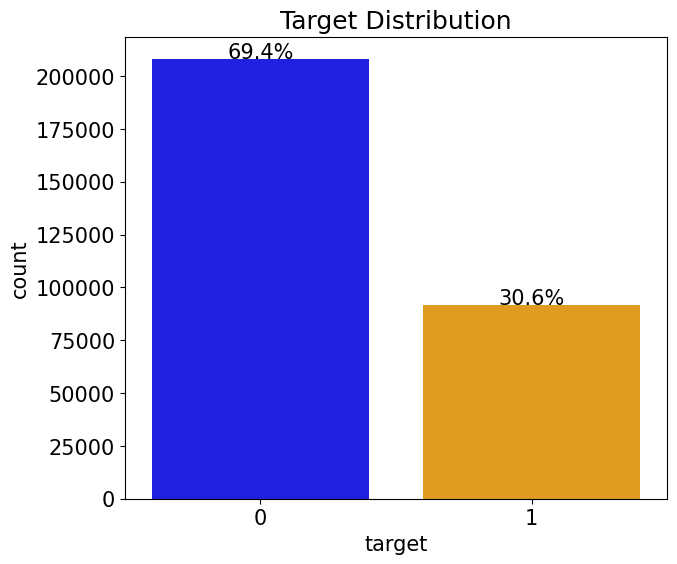

In [ ]:
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

# 범주별 색상 지정
palette = {'0': 'blue', '1': 'orange'}

ax = sns.countplot(x='target', data=train, palette=palette)
write_percent(ax, len(train))
ax.set_title("Target Distribution")

**분석**
- 7: 3의 비율을 가지고 있다.

#### 이진 피처 분포

**To-do**
- 이진 피처의 분포를 타깃값별로 따로 그려본다.
- 특정 고윳값이 특정 타깃값에 치우치는지 확인해본다.

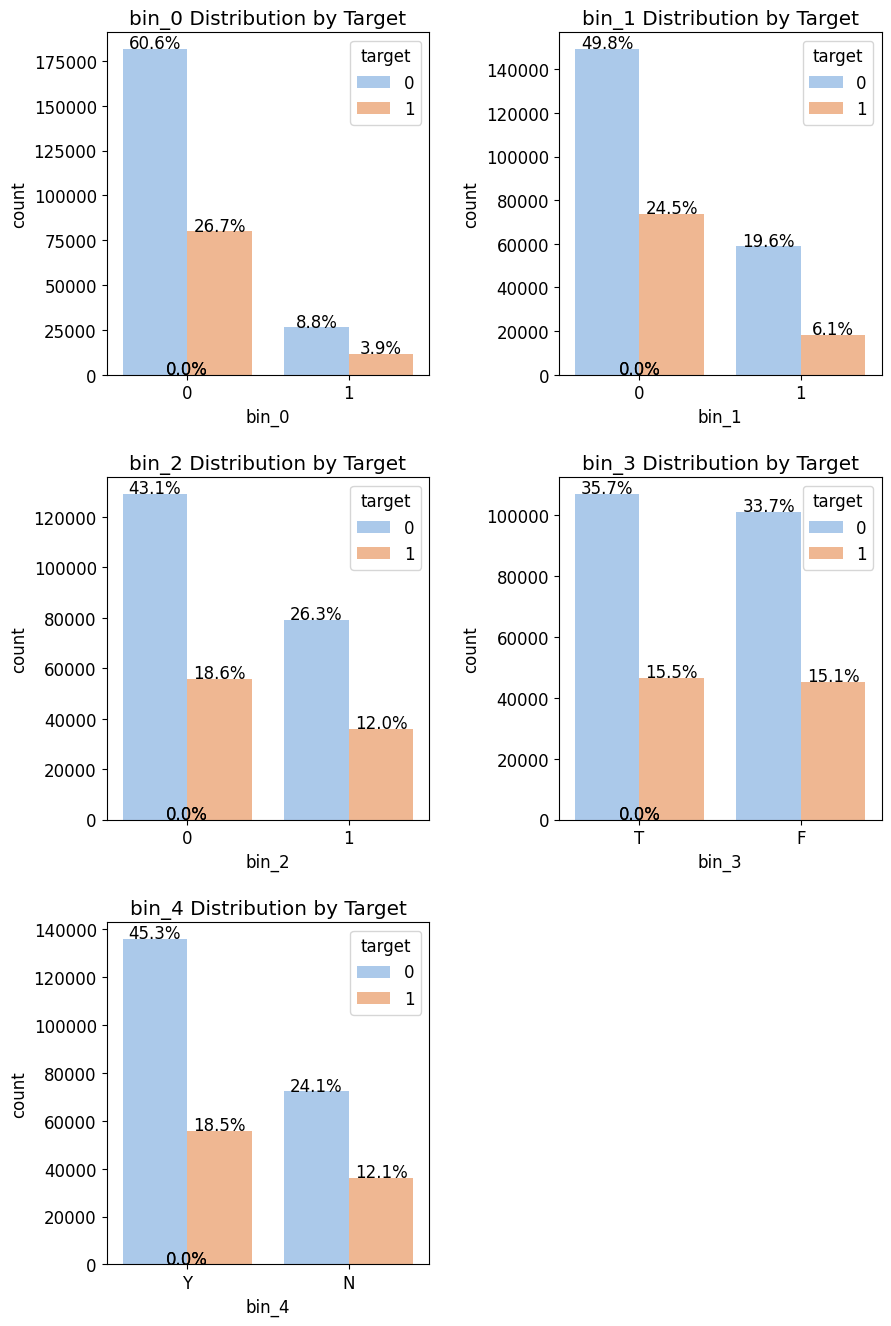

In [ ]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열의 Figure 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌위/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)

    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))

**분석**
- 고윳값별로 나눠봐도 타깃값 0, 1의 분포가 대체로 7:3 수준으로 보여지는 것을 통해 이진 피처들은 특정 타깃값에 치우치지 않았음을 확인할 수 있다.

#### 명목형 피처 분포

**To-do**
- 명목형 피처 분포와 명목형 피처별 타깃값 1의 비율을 살펴본다.
- 5 ~ 9 피처까지는 고윳값의 개수가 많고 의미를 알 수 없기 때문에 0 ~ 4 피처까지만 시각화한다.

##### 교차분석표 생성 함수 만들기
교차표(cross-tabulation) = 교차분석표
- 범주형 데이터 2개를 비교 분석하는 데 사용되는 표로, 각 범주형 데이터의 빈도나 통계량을 행과 열로 결합해놓은 표를 말한다.
- 명목형 피처별 타깃값 1 비율을 구하기 위해 사용된다.
- 판다스의 crosstab() 함수 사용

In [ ]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [ ]:
# 정규화
# normalize 파라미터에 'index'를 전달하면 인덱스를 기준으로 정규화한다. 'columns'를 전달하면 열을 기준으로 정규화한다.
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index') * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [ ]:
# 피처가 열로 설정돼 있어야 그래프를 그리기 편하기 때문에 인덱스를 재설정한다.
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [ ]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [ ]:
crosstab = get_crosstab(train, 'nom_0')
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

##### 포인트플롯 생성 함수 만들기
- 이미 카운트플롯이 그려진 축에 포인트플롯을 중복으로 그려준다.

In [ ]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성

    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values, color='black', legend=False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')

##### 피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수 만들기

In [ ]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 10)):
    plt.figure(figsize=size) # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.5) # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시

        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기

        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

##### 결과 생성

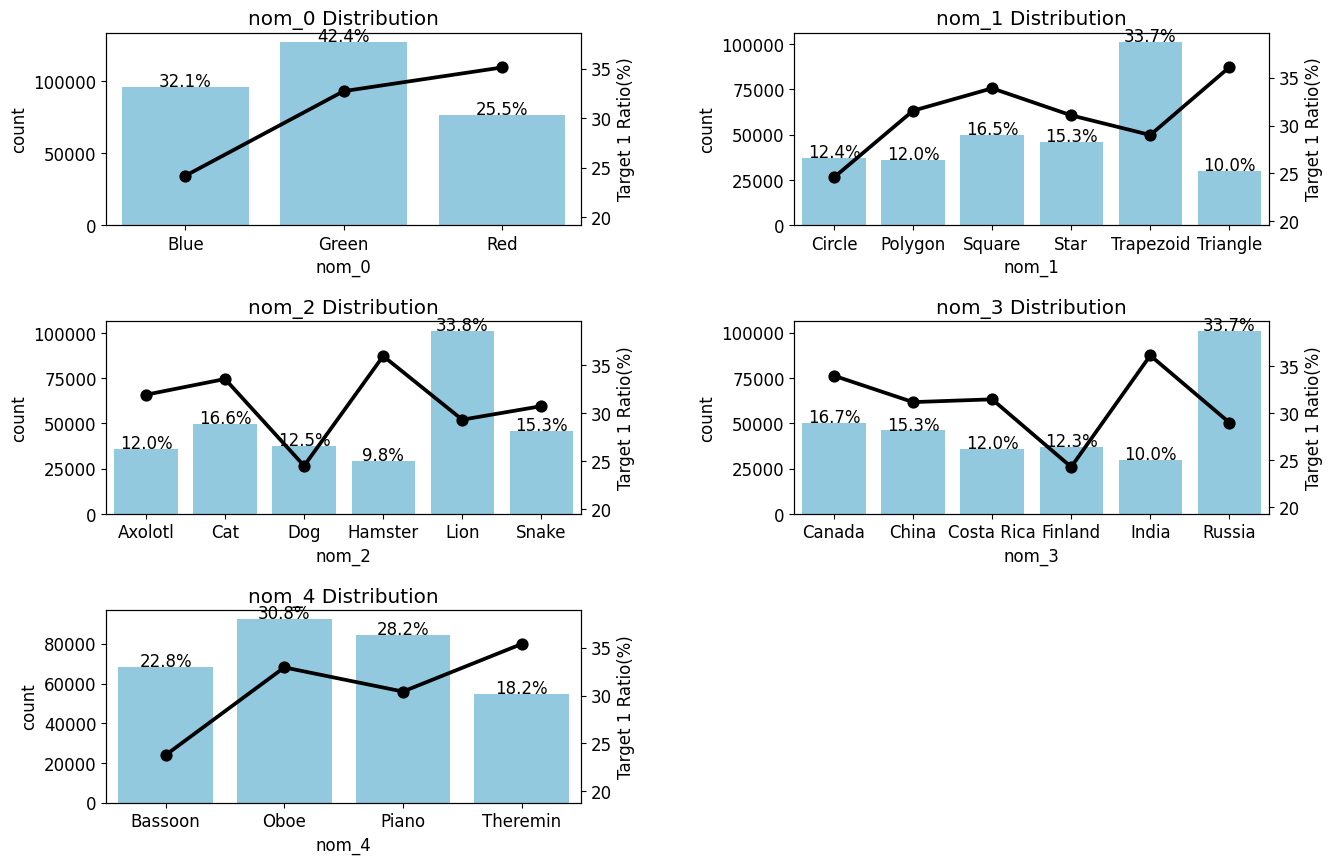

In [ ]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

**분석**
- 0 ~ 4 피처는 고윳값별로 타깃값 1의 비율이 서로 다르다.
 - '타깃값에 대한 예측 능력이 있음'을 의미한다.
 - 모두 모델링에 사용한다.
- 명목형 피처는 순서를 무시해도 되고 고윳값 개수가 적으므로 이후 원-핫 인코딩을 사용한다.

- 5 ~ 9 피처는 시각화하기 어렵다.
    - 우선 필요한 피처라고 가정하여 모델링을 진행한다.
        - 해당 피처들을 하나씩 제거하면서 성능이 좋아지는지 여부를 바탕으로 모델링에 사용할지말지를 결정할 수도 있다.
    - 고윳값 개수가 많지만, 피처들의 의미를 몰라 그룹화하기 어렵고, 전체 데이터 양이 많지 않기 때문에 원-핫 인코딩을 사용한다.

#### 순서형 피처 분포

**To-do**
- plot_cat_dist_with_true_ratio() 함수를 사용한다.
    - 0 ~ 3 피처는 고윳값이 15개 이하이므로 2행 2열의 그래프를 그린다.
    - 4 ~ 5 피처는 고윳값의 개수가 많으므로 2행 1열의 그래프를 그린다.

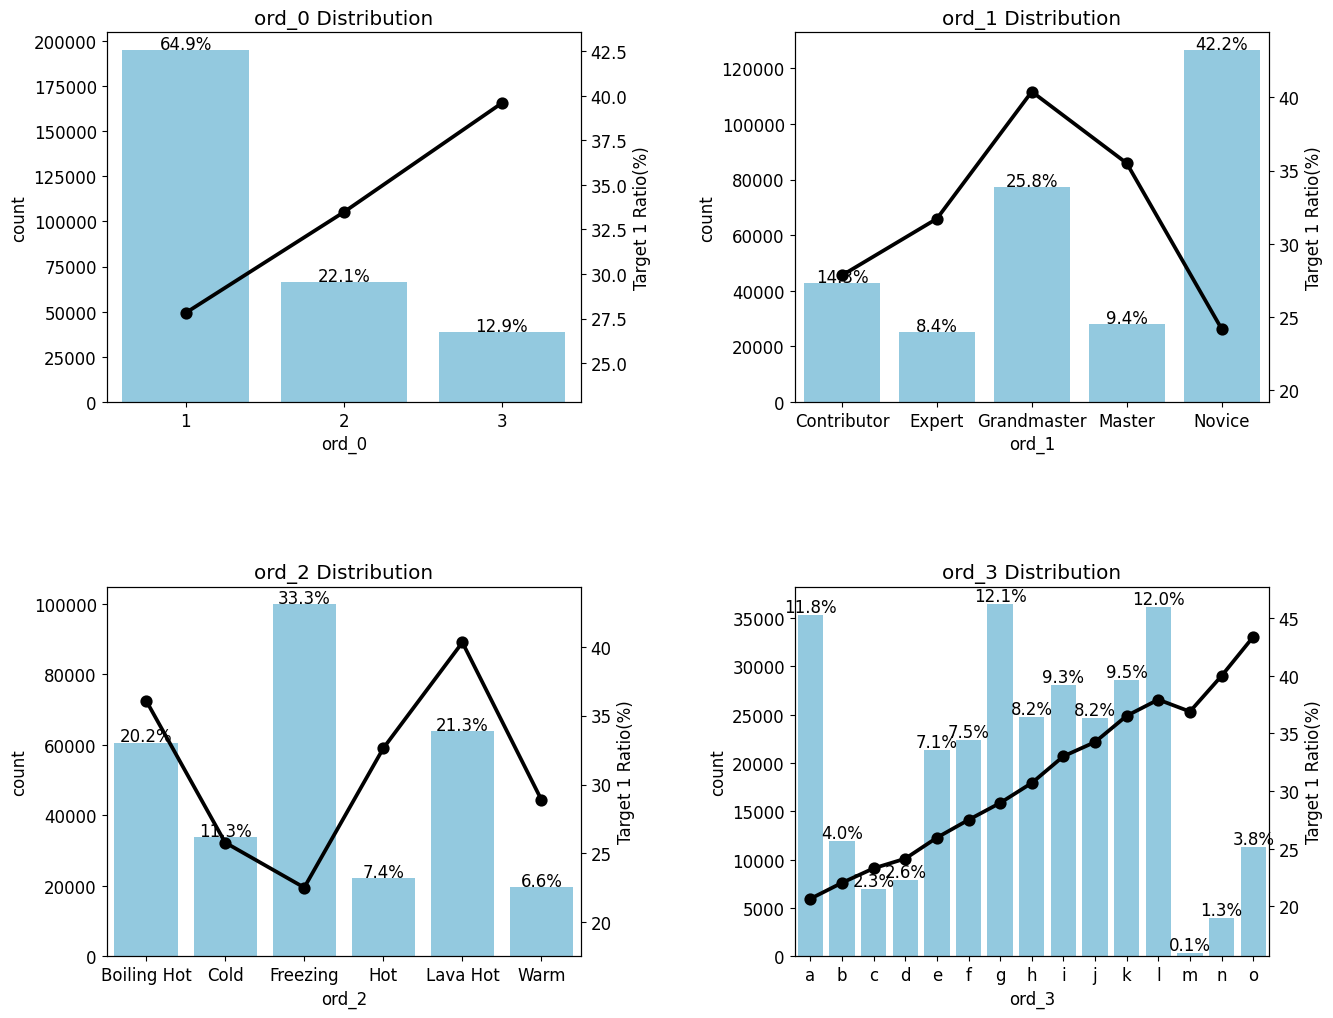

In [ ]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

- ord_1, ord_2의 피처 값들의 순서를 정렬한다.
- CategoricalDtype()
    - categories : 범주형 데이터 타입으로 인코딩할 값 목록
    - ordered : True로 설정하면 categories에 전달한 값의 순서가 유지된다.

*countplot() 함수의 order 파라미터에 순서를 전달하면 순서대로 그래프를 그리지만, 근본적으로 피처 자체에 순서가 지정된 것이 아니다.*

In [ ]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

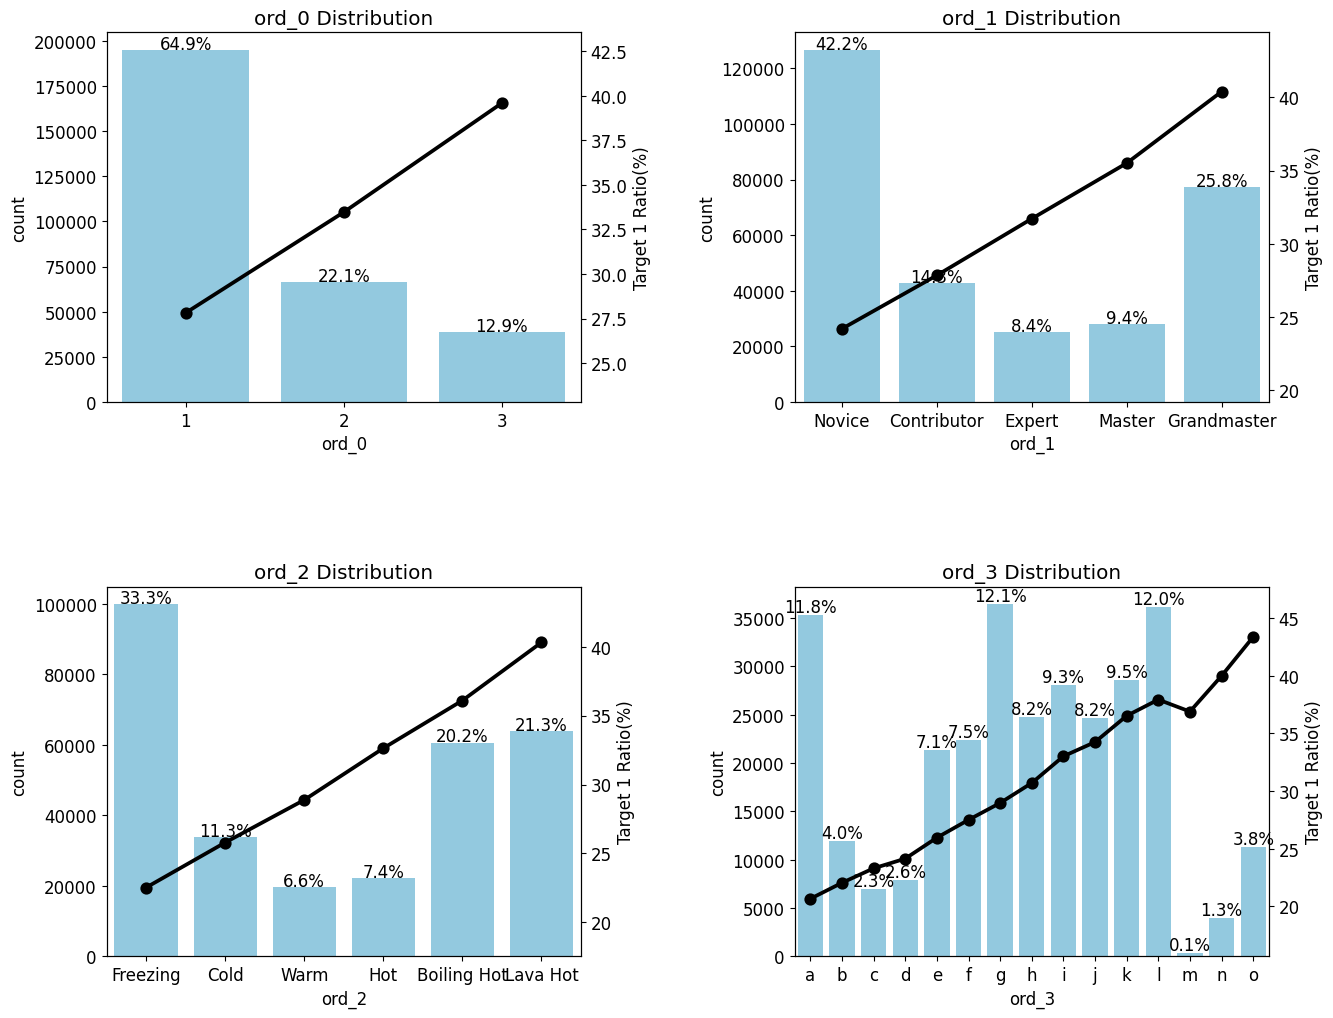

In [ ]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

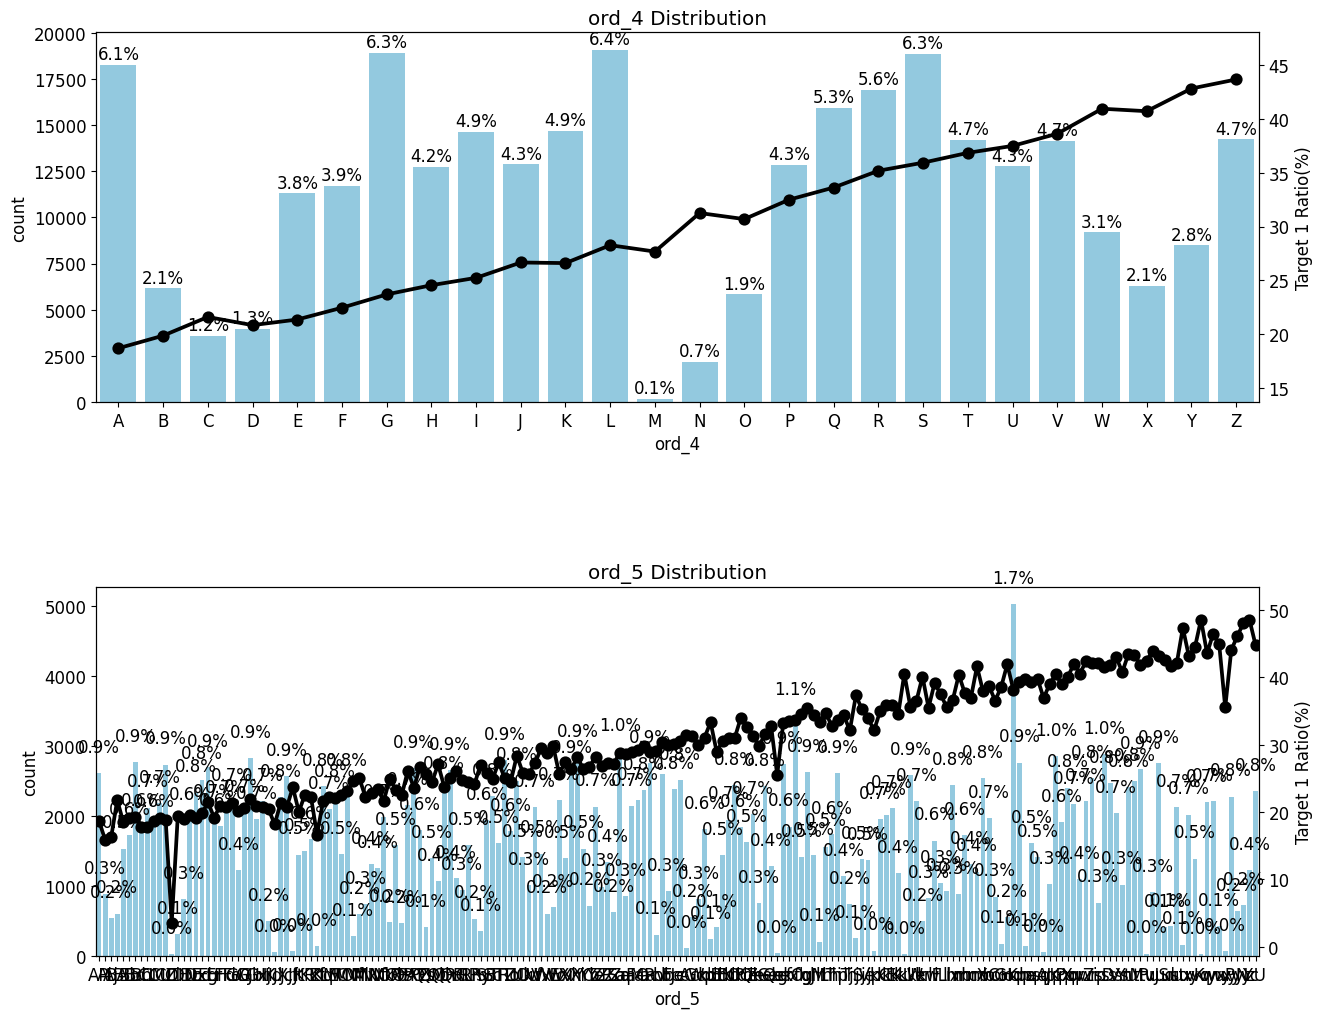

In [ ]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15, 12))

**분석**
- ord_0, 1, 2, 3, 4, 5 모두 고윳값 순서에 따라 타깃값 1 비율도 비례해서 커진다는 것을 확인할 수 있다.
- 순서형 피처 모두 고윳값 순서에 따라 타깃값 1인 비율이 증가한다는 사실을 알 수 있으므로, 순서와 비율 사이에 상관관계가 있다는 것을 확인할 수 있다. 따라서, 모두 모델링 시 사용한다.

#### 날짜 피처 분포

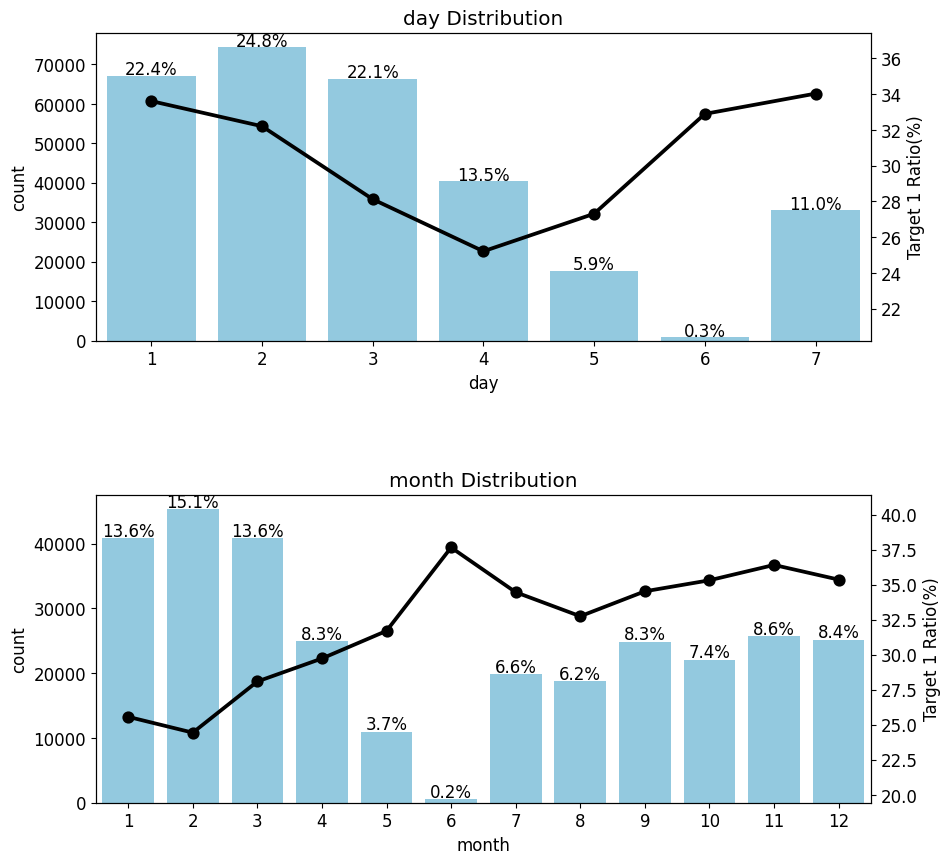

In [ ]:
plot_cat_dist_with_true_ratio(train, ['day', 'month'], num_rows=2, num_cols=1, size=(10, 10))

**분석**
- day 피처는 7개인 걸로 보아 요일이라고 추측된다.
    - 1 ~ 4에서는 타깃값 1의 비율이 줄어들고, 4 ~ 7에서는 비율이 증가한다.
- month 피처는 day 피처와 다소 반대되는 양상을 보이고 있다.

**주의 사항**
- 요일과 월 피처 모두 값이 숫자이다.
    - 머신러닝 모델은 숫자 값을 가치의 크고 작음으로 해석한다. 12월과 1월, 1월과 2월은 둘 다 한 달 차이지만 값으로 볼 때는 11과 1차이이다.
    - 삼각함수(sin, cos)를 사용해 인코딩하면 시작과 끝이 매끄럽게 연결되어 문제가 해결된다.
- 매년, 매월, 매주, 매일 반복되는 데이터를 순환형 데이터라고 부른다.

*요일, 월 피처에 원-핫 인코딩을 적용하는게 경진대회에서 성능이 좋았다.*

*데이터가 그리 크지 않아서 삼각함수 인코딩이 제대로 효과를 발휘하지 못했을 수 있다.*

## 베이스라인 모델

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/train.csv', index_col='id')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/test.csv', index_col='id')
submission = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/sample_submission.csv', index_col='id')

### 피처 엔지니어링

#### 데이터 합치기

**To-do**
- 문자를 숫자로 변경시켜, 머신러닝 모델이 데이터를 인식할 수 있게 한다.

In [ ]:
all_data = pd.concat([train, test]) # 훈련, 테스트 데이터 합치기
all_data = all_data.drop('target', axis=1) # 타깃값 제거
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


#### 원-핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

#### 데이터 나누기

In [ ]:
num_train = len(train) # 훈련 데이터 개수

# 데이터 나누기
X_train = all_data_encoded[:num_train] # 0 ~ num_train-1
X_test = all_data_encoded[num_train:] # num_train ~ 마지막

y = train['target']

##### 검증 데이터로 나누기

train_test_split() : 전체 데이터를 훈련 데이터와 검증(혹은 테스트) 데이터로 나누는 함수

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.1,
                                                      stratify=y, # 지정한 값을 각 그룹에 공정하게 배분
                                                      random_state=10)

### 모델 훈련

**LogisticRegression()**
- max_iter : 모델의 회귀 계수를 업데이트하는 반복 횟수

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 모델 성능 검증

**To-do**
- 타깃 예측값과 실제 타깃값 사이의 ROC AUC를 구해본다.

타깃값 예측 메서드 in 사이킷런
- predict() : 타깃값 자체(0 or 1)를 예측
- predict_proba() : 타깃값의 확률(0일 확률, 1일 확률)을 예측

In [ ]:
logistic_model.predict_proba(X_valid)

array([[0.23273481, 0.76726519],
       [0.91407038, 0.08592962],
       [0.83036873, 0.16963127],
       ...,
       [0.24858679, 0.75141321],
       [0.49420831, 0.50579169],
       [0.95659243, 0.04340757]])

In [ ]:
logistic_model.predict(X_valid)

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
# 검증 데이터를 활용한 타깃 예측
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1] # 검증 데이터 타깃값이 1일 확률을 저장

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7965


### 예측 및 결과 제출

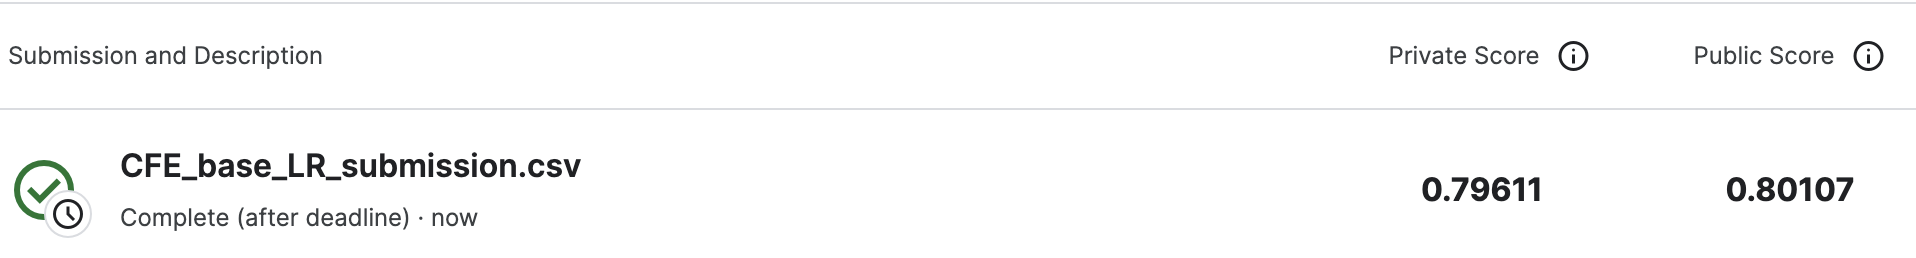

In [ ]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

## 성능 개선 1

**To-do**
1. 피처 맞춤 인코딩
    - 이진 피처, 순서형 피처(ord_1, ord2)는 수작업으로 인코딩
    - 순서형 피처(ord_3, ord_4, ord_5)는 ordinal 인코딩
    - 명목형 피처, 날짜 피처는 원-핫 인코딩
2. 피처 스케일링
    - 순서형 피처에만 적용
        - 이진 피처는 값이 두 개이기 때문에 0, 1로만 구성되고, 명목형 피처, 날짜 피처 또한 원-핫 인코딩 이후 0, 1로 구성될 것이기 때문. 즉, 이진 피처, 명목형 피처, 날짜 피처는 인코딩 후 이미 최솟값 0, 최댓값 1로 범위가 일치하기 때문에 스케일링을 하지 않아도 된다.
3. 하이퍼파라미터 최적화

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/train.csv', index_col='id')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/test.csv', index_col='id')
submission = pd.read_csv('/content/drive/MyDrive/Kaggle/Categorical_Feature_Encoding/sample_submission.csv', index_col='id')

### 피처 맞춤 인코딩


#### 데이터 합치기

In [ ]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1)

#### 이진 피처 인코딩

**To-do**
- bin_0, 1, 2는 이미 0과 1로 구성되어 있으니 생략
- bin_3, 4는 T or F, Y or N의 문자로 구성되어 있기 때문에 0과 1로 변경해준다.
    - map() 함수는 전달받은 딕셔너리나 함수를 Series의 모든 원소에 적용해 결과를 반환한다.

In [ ]:
all_data['bin_3'] = all_data['bin_3'].map({'F': 0, 'T': 1})
all_data['bin_4'] = all_data['bin_4'].map({'N': 0, 'Y': 1})

#### 순서형 피처 인코딩

**To-do**
- ord_0: 이미 숫자로 구성되어 있으므로 생략
- ord_1, 2는 순서를 정해서 인코딩
- ord_3 ~ 5는 알파벳 순서대로 인코딩
    - 고윳값 개수가 많아 번거롭기 때문에 OrdinalEncoder() 사용

In [ ]:
ord1dict = {'Novice': 0, 'Contributor': 1, 'Expert': 2,
            'Master': 3, 'Grandmaster': 4}

ord2dict = {'Freezing': 0, 'Cold': 1, 'Warm': 2,
            'Hot': 3, 'Boiling Hot': 4, 'Lava Hot': 5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])
for feature, categories in zip(ord_345, ord_encoder.categories_): # categories_ : 어떤 순서로 ordinal 인코딩을 적용했는지 보여준다.
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

#### 명목형 피처 인코딩

**To-do**
- 순서를 무시해도 상관없기 때문에 원-핫 인코딩을 적용한다.
    - 원-핫 인코딩을 하면 열 개수가 늘어나서 all_data에서 곧바로 인코딩할 수 없기 때문에 인코딩 된 명목형 피처를 별도 행렬에 저장하고, all_data에서 명목형 피처를 삭제한다.
    - OneHotEncoder는 희소 행렬을 CSR 형식으로 반환한다.

In [ ]:
nom_features = ['nom_' + str(i) for i in range(10)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])
encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [ ]:
all_data = all_data.drop(nom_features, axis=1)

#### 날짜 피처 인코딩

**To-do**
- 원-핫 인코딩을 적용한다.

In [ ]:
date_features = ['day', 'month']

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1)
encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

### 피처 스케일링

#### 순서형 피처 스케일링

**To-do**
- min_max 정규화 적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)]
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

#### 인코딩 및 스케일링된 피처 합치기

**To-do**
- all_data와 따로 원-핫 인코딩 결과를 저장한 명목형 피처, 날짜 피처를 합한다.
    - 원-핫 인코딩 결과는 CSR 형식이므로 변환하여 맞춰준다. = scipy.sparse.csr_matrix()

In [ ]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data), # 수평 방향
                               encoded_nom_matrix,
                               encoded_date_matrix],
                               format = 'csr') # 기본값은 'coo'

In [ ]:
all_data_sprs # 합쳐진 후 500,000 x 16,306 이므로 DataFrame으로 처리하면 메모리 낭비가 심하기 때문에 CSR 형식을 그대로 사용한다.

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

#### 데이터 나누기

In [ ]:
num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.1,
                                                      stratify=y,
                                                      random_state=10)

### 하이퍼파라미터 최적화

**To-do**
- 그리드서치를 활용하여 로지스틱 회귀 모델의 C, max_tier 파라미터를 최적화한다.
    - C: 규제 강도를 조절하는 파라미터로 값이 작을수록 규제 강도가 세진다.
    - 평가지표를 ROC AUC로 지정한다.

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
lr_params = {'C': [0.1, 0.125, 0.2], 'max_iter': [800, 900, 1000],
             'solver': ['liblinear'], 'random_state': [42]}

gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc',
                                         cv=5)

gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하이퍼파라미터: ', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터:  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 7min 59s, sys: 5min 31s, total: 13min 31s
Wall time: 10min


#### 모델 성능 검증

In [ ]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8045


### 예측 및 결과 제출

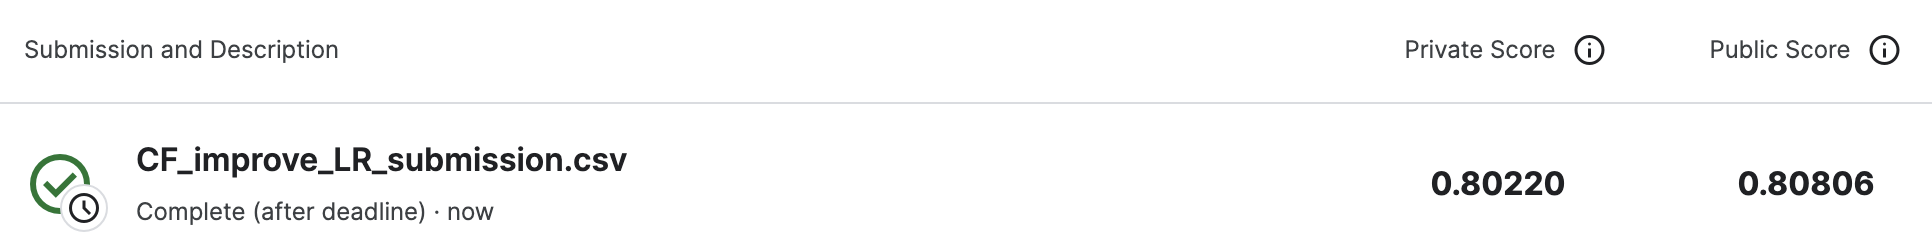

In [ ]:
y_preds= gridsearch_logistic_model.predict_proba(X_test)[:, 1]

submission['target'] = y_preds
submission.to_csv('CF_improve_submission.csv')